In [ ]:
'''
Dataset: https://www.kaggle.com/ritesaluja/bank-note-authentication-uci-data

UCI: http://archive.ics.uci.edu/ml/datasets/banknote+authentication
'''

In [1]:
from pyforest import*

In [2]:
lazy_imports()

['from sklearn.ensemble import GradientBoostingClassifier',
 'import sys',
 'import bokeh',
 'import os',
 'from dask import dataframe as dd',
 'from sklearn.preprocessing import OneHotEncoder',
 'from sklearn.manifold import TSNE',
 'from pyspark import SparkContext',
 'from sklearn.model_selection import train_test_split',
 'from sklearn import svm',
 'from pathlib import Path',
 'import awswrangler as wr',
 'import tensorflow as tf',
 'import nltk',
 'import pydot',
 'import tqdm',
 'import seaborn as sns',
 'import glob',
 'import spacy',
 'import pickle',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'import plotly.express as px',
 'import dash',
 'import plotly.graph_objs as go',
 'import sklearn',
 'from sklearn.ensemble import RandomForestClassifier',
 'import matplotlib as mpl',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'from sklearn.ensemble import RandomForestRegressor',
 'import plotly as py',
 'import altair as alt',
 'import lightgbm a

In [31]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
data = pd.read_csv('./data/BankNote.csv')

<IPython.core.display.Javascript object>

In [4]:
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
data.shape

(1372, 5)

In [7]:
data.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [8]:
data.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

<br>

## Exploratory Analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

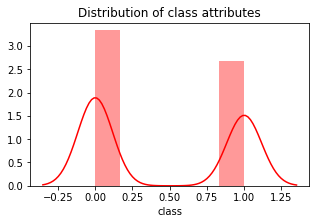

In [16]:
plt.figure(figsize=(5,3))
plt.title('Distribution of class attributes')
sns.distplot(data['class'], color='red');

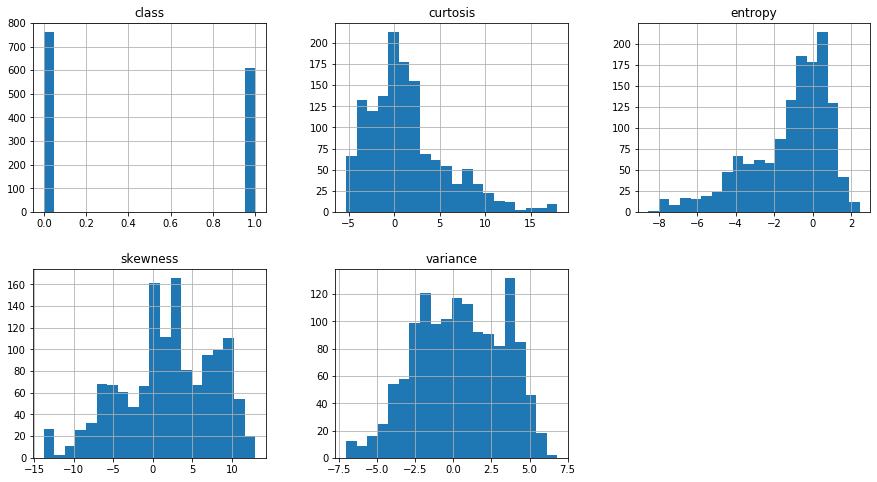

In [21]:
data.hist(figsize=(15,8),
    layout=(2,3),
    bins=20);

In [ ]:
'''import warnings

warnings.filterwarnings('ignore')'''

<IPython.core.display.Javascript object>

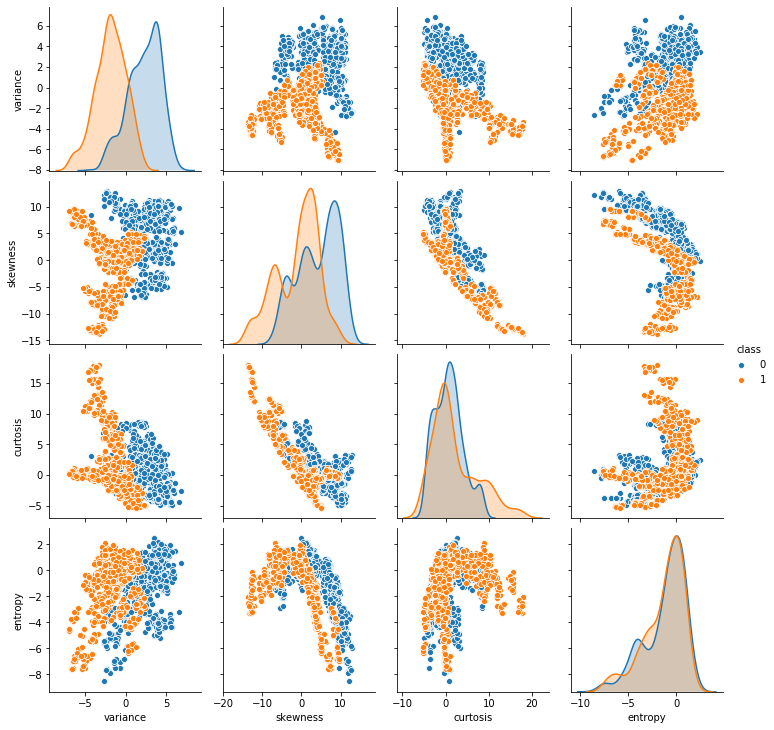

In [23]:
sns.pairplot(data, hue="class");

## Data preperation

In [26]:
X = data.drop(['class'], axis=1)
y = data['class']

In [27]:
y.value_counts() # Classes has close number of item, so do not need to upsampling or downsampling

0    762
1    610
Name: class, dtype: int64

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

<IPython.core.display.Javascript object>

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.fit_transform(X_test)

In [47]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [48]:
# prepare models
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RanF', RandomForestClassifier()))
models.append(('SVM', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('XGBoost', XGBClassifier()))

In [49]:
# evaluate all the models
results = []
names = []
scoring = 'accuracy'
seed = 7

for name, model in models:
	kfold = KFold(n_splits=10, random_state=None)
	cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LDA: 0.974532 (0.023491)
KNN: 1.000000 (0.000000)
CART: 0.981038 (0.010436)
RanF: 0.991257 (0.008506)
SVM: 0.996356 (0.004893)
LR: 0.988337 (0.011401)
XGBoost: 0.996356 (0.004893)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

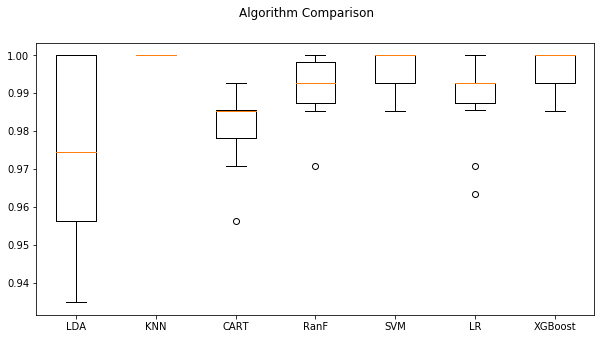

In [50]:
# Comparing algorithm using boxplot
fig = plt.figure(figsize=(10,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
'''
from sklearn.neural_network import MLPClassifier
multi_classifier = MLPClassifier(hidden_layer_sizes=(8,4), max_iter=8000, alpha=0.0001, solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
multi_classifier.fit(X_train,y_train)
multi_accuracies = cross_val_score(estimator=multi_classifier,X=X_test,y=y_test,cv=10)
'''

In [54]:
from sklearn.metrics import accuracy_score

ranF_classifier = RandomForestClassifier(n_estimators=50, criterion='entropy', random_state=0)

ranF_accuracies = cross_val_score(estimator=ranF_classifier, X=X, y=y, cv=10)
 
print("Accuracies:\n",ranF_accuracies)
print("Mean Accuracy: ",ranF_accuracies.mean())

Accuracies:
 [0.99275362 0.99275362 0.99270073 0.99270073 0.99270073 0.98540146
 1.         0.99270073 1.         1.        ]
Mean Accuracy:  0.9941711625938856


In [70]:
ranF_classifier.fit(X_train, y_train)

y_test_pred = ranF_classifier.predict(X_test)

print('Accuracy:{0:.4g}%'.format(accuracy_score(y_test, y_test_pred)*100))

Accuracy:97.82%


Confusion Matrix For Random Forest


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

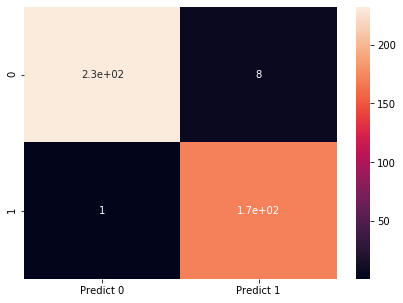

In [71]:
from sklearn import metrics

print("Confusion Matrix For Random Forest")
cm = metrics.confusion_matrix(y_test, y_test_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]], columns = [i for i in ["Predict 0","Predict 1"]])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)